___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **RownNmber:** Row Numbers from 1 to 10000.
- **CustomerId:** A unique ID that identifies each customer.
- **Surname:** The customer’s surname.
- **CreditScore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **Geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **Tenure:** The number of years for which the customer has been with the bank.
- **Balance:** Bank balance of the customer.
- **NumOfProducts:** the number of bank products the customer is utilising.
- **HasCrCard:** The number of credit cards given to the customer by the bank.
- **IsActiveMember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **EstimatedSalary:**
- **Exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Import Libraries & Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mt
import sklearn as sk
import tensorflow as tf
import platform

In [3]:
import matplotlib.pyplot as plt

In [201]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import RocCurveDisplay, roc_auc_score, roc_curve

from sklearn.utils.class_weight import compute_class_weight

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam
from tensorflow.keras.callbacks import EarlyStopping
from keras.metrics import Recall

from tensorflow.keras.models import load_model

import optuna
import pickle

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
plt.rcParams["figure.figsize"] = (10, 6)
sns.set_style("whitegrid")
pd.set_option("display.float_format", lambda x: "%.3f" % x)
pd.set_option("display.max_columns", None)

In [6]:
print(f'python = {platform.python_version()}\n'
      f'pandas = {pd.__version__}\n'
      f'numpy = {np.__version__}\n'
      f'seaborn = {sns.__version__}\n'
      f'matplot = {mt.__version__}\n'
      f'scikit-learn = {sk.__version__}\n'
      f'tensorflow = {tf.__version__}')

python = 3.10.12
pandas = 1.5.3
numpy = 1.23.5
seaborn = 0.12.2
matplot = 3.7.1
scikit-learn = 1.2.2
tensorflow = 2.14.0


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [9]:
# df = pd.read_csv('Churn_Modelling.csv')
df = pd.read_csv('drive/MyDrive/data/Churn_Modelling.csv')

In [10]:
df.sample(20)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1782,1783,15642002,Hayward,554,France,Female,35,6,117707.180,2,0,0,95277.150,1
1258,1259,15740494,Cameron,633,France,Female,33,3,0.000,2,1,0,191111.020,0
1600,1601,15748718,Gordon,517,France,Male,28,2,115062.610,1,1,0,179056.230,0
8539,8540,15668594,Diggs,620,Germany,Female,25,1,137712.010,1,1,1,76197.050,0
9594,9595,15619898,Chiefo,785,France,Male,55,5,0.000,2,1,1,7008.650,0
3111,3112,15657163,Cockrum,623,Germany,Male,42,1,149332.480,2,1,0,100834.220,0
4317,4318,15592194,Metcalf,492,France,Female,28,9,0.000,2,1,0,95957.090,0
326,327,15601848,Scott,594,France,Male,35,2,0.000,2,1,0,103480.690,0
3438,3439,15722404,Carpenter,445,France,Female,30,3,0.000,2,1,1,127939.190,0
822,823,15765311,Zhirov,642,Spain,Male,34,8,0.000,1,1,0,72085.100,0


In [11]:
df.columns = df.columns.str.lower()

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rownumber        10000 non-null  int64  
 1   customerid       10000 non-null  int64  
 2   surname          10000 non-null  object 
 3   creditscore      10000 non-null  int64  
 4   geography        10000 non-null  object 
 5   gender           10000 non-null  object 
 6   age              10000 non-null  int64  
 7   tenure           10000 non-null  int64  
 8   balance          10000 non-null  float64
 9   numofproducts    10000 non-null  int64  
 10  hascrcard        10000 non-null  int64  
 11  isactivemember   10000 non-null  int64  
 12  estimatedsalary  10000 non-null  float64
 13  exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
# show dataframe information
def information(df):
    print(f"RangeIndex: {df.shape[0]} entries, {df.index.min()} to {df.index.max()}")
    print(f"Total column: {df.shape[1]}\n")
    print(f"column{'':<30}type{'':<10}null %{'':<7}nunique %{'':<7} unique")

    print("-"*100)
    for column in df.columns:
        print(f"{column:<35} {str(df[column].dtype):<10}", end="")

        tnull = "(%"+str(round(df[column].isnull().sum()/df.shape[0], 2)) +")"
        print(f"{df[column].isnull().sum():>4} {tnull:<10}", end="")

        print(f"{df[column].nunique():>4} (%{df[column].nunique()/df.shape[0]:.3f}){'':<5}" , end="")

        # if len(df[column].nunique())<5 :
        #     print(f"{df[column].unique():>4}")
        # else:
        #     print()
        unique_values = sorted(df[column].unique())
        if len(unique_values) < 20 :
            print(f" {unique_values}")
        else:
            print()


In [ ]:
information(df)

RangeIndex: 10000 entries, 0 to 9999
Total column: 14

column                              type          null %       nunique %        unique
----------------------------------------------------------------------------------------------------
rownumber                           int64        0 (%0.0)    10000 (%1.000)     
customerid                          int64        0 (%0.0)    10000 (%1.000)     
surname                             object       0 (%0.0)    2932 (%0.293)     
creditscore                         int64        0 (%0.0)     460 (%0.046)     
geography                           object       0 (%0.0)       3 (%0.000)      ['France', 'Germany', 'Spain']
gender                              object       0 (%0.0)       2 (%0.000)      ['Female', 'Male']
age                                 int64        0 (%0.0)      70 (%0.007)     
tenure                              int64        0 (%0.0)      11 (%0.001)      [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
balance                       

In [ ]:
df.drop(columns = ['rownumber', 'customerid' ], axis = 1).describe().T

,count,mean,std,min,25%,50%,75%,max
creditscore,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
numofproducts,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
hascrcard,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
isactivemember,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
estimatedsalary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480
exited,10000.000,0.204,0.403,0.000,0.000,0.000,0.000,1.000


In [ ]:
df['geography'].value_counts(normalize = True)

geography
France    0.501
Germany   0.251
Spain     0.248
Name: proportion, dtype: float64

In [ ]:
df['gender'].value_counts(normalize = True)

gender
Male     0.546
Female   0.454
Name: proportion, dtype: float64

In [ ]:
df['exited'].value_counts(normalize = True)

exited
0   0.796
1   0.204
Name: proportion, dtype: float64

In [ ]:
((df['exited'] == 1) & (df['balance'] !=0)).sum()/df.shape[0]

0.1537

In [ ]:
df[(df['exited'] == 1) & (df['balance'] !=0)]

,rownumber,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
5,6,15574012,Chu,645,Spain,Male,44,8,113755.780,2,1,0,149756.710,1
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.740,4,1,0,119346.880,1
16,17,15737452,Romeo,653,Germany,Male,58,1,132602.880,1,1,0,5097.670,1
35,36,15794171,Lombardo,475,France,Female,45,0,134264.040,1,1,0,27822.990,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9975,9976,15666295,Smith,610,Germany,Male,50,1,113957.010,2,1,0,196526.550,1
9981,9982,15672754,Burbidge,498,Germany,Male,42,3,152039.700,1,1,1,53445.170,1
9982,9983,15768163,Griffin,655,Germany,Female,46,7,137145.120,1,1,0,115146.400,1
9991,9992,15769959,Ajuluchukwu,597,France,Female,53,4,88381.210,1,1,0,69384.710,1


In [12]:
df1 =  df.copy()

In [13]:
# creating a dataset after using deployment
random_state = 42

df_predict = df1.sample(n=5, random_state=42)

df1 = df1.drop(df_predict.index)

In [14]:
df_predict.head()

,rownumber,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
6252,6253,15687492,Anderson,596,Germany,Male,32,3,96709.070,2,0,0,41788.370,0
4684,4685,15736963,Herring,623,France,Male,43,1,0.000,2,1,1,146379.300,0
1731,1732,15721730,Amechi,601,Spain,Female,44,4,0.000,2,1,0,58561.310,0
4742,4743,15762134,Liang,506,Germany,Male,59,8,119152.100,2,1,1,170679.740,0
4521,4522,15648898,Chuang,560,Spain,Female,27,7,124995.980,1,1,1,114669.790,0


In [15]:
df1.head()

,rownumber,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [16]:
def transform_df(df):
    df['germany'] = np.where(df['geography'] == 'Germany', 1, 0)
    df['spain'] = np.where(df['geography'] == 'Spain', 1, 0)
    df['female'] = np.where(df['gender'] == 'Female', 1, 0)

    df.drop(columns = ['rownumber', 'customerid', 'surname', 'geography','gender'], inplace = True)

    return df

In [17]:
df_transform = transform_df(df1)
df_transform.head()

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,germany,spain,female
0,619,42,2,0.000,1,1,1,101348.880,1,0,0,1
1,608,41,1,83807.860,1,0,1,112542.580,0,0,1,1
2,502,42,8,159660.800,3,1,0,113931.570,1,0,0,1
3,699,39,1,0.000,2,0,0,93826.630,0,0,0,1
4,850,43,2,125510.820,1,1,1,79084.100,0,0,1,1


In [18]:
df_transform.shape

(9995, 12)

# Preprocessing of Data
- Train | Test Split, Scalling

In [19]:
X = df_transform.drop(['exited'], axis=1)
y = df_transform['exited']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=random_state,  stratify=y)


In [21]:
X_train.head()

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,germany,spain,female
6177,731,37,3,116880.530,1,0,0,172718.350,1,0,0
2685,679,60,6,0.000,2,1,1,77331.770,0,0,0
9938,526,36,5,91132.180,1,0,0,58111.710,0,1,1
3988,644,32,8,141528.880,1,1,1,167087.340,1,0,1
8734,706,47,10,144090.420,1,1,0,140938.950,1,0,1


In [ ]:
y_train.head()

6177    1
2685    0
9938    0
3988    1
8734    1
Name: exited, dtype: int64

In [ ]:
X_test.head()

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,germany,spain,female
4787,529,42,1,157498.900,1,1,1,82276.620,0,0,0
5144,485,25,3,134467.260,1,1,1,113266.090,0,0,1
21,636,32,8,0.000,2,1,0,138555.460,0,1,1
1509,528,37,6,103772.450,1,1,0,197111.990,0,0,0
8623,430,38,8,153058.640,1,1,0,99377.270,1,0,1


In [ ]:
y_test.head()

4787    0
5144    0
21      0
1509    0
8623    0
Name: exited, dtype: int64

In [22]:
print(f'X_train shape: {X_train.shape}\n'
      f'y_train shape: {y_train.shape}\n'
      f'X_test shape: {X_test.shape}\n'
      f'y_test shape: {y_test.shape}')

X_train shape: (8995, 11)
y_train shape: (8995,)
X_test shape: (1000, 11)
y_test shape: (1000,)


In [24]:
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
pickle.dump(scaler, open("scaler_churn", "wb"))

# Modelling & Model Performance

## without class_weigth

### Create The Model

In [106]:
model1 = Sequential()

model1.add(Dense(18, activation="relu", input_dim=X_train.shape[1]))
model1.add(Dense(9, activation="relu"))
model1.add(Dense(4, activation="relu"))
model1.add(Dense(2, activation="relu"))
model1.add(Dense(1, activation="sigmoid"))
opt = Adam(learning_rate=0.001)
model1.compile(optimizer=opt, loss="binary_crossentropy", metrics=["accuracy"])

In [78]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 18)                216       
                                                                 
 dense_6 (Dense)             (None, 9)                 171       
                                                                 
 dense_7 (Dense)             (None, 4)                 40        
                                                                 
 dense_8 (Dense)             (None, 2)                 10        
                                                                 
 dense_9 (Dense)             (None, 1)                 3         
                                                                 
Total params: 440 (1.72 KB)
Trainable params: 440 (1.72 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [37]:
# model1.weights

In [107]:
model1.fit(x=X_train, y=y_train, validation_split=0.1, batch_size=32, epochs=1000, verbose=1)

Epoch 1/1000
253/253 [==============================] - 3s 5ms/step - loss: 0.5451 - accuracy: 0.7839 - val_loss: 0.4739 - val_accuracy: 0.8022
Epoch 2/1000
253/253 [==============================] - 1s 4ms/step - loss: 0.4555 - accuracy: 0.8040 - val_loss: 0.4463 - val_accuracy: 0.8133
Epoch 3/1000
253/253 [==============================] - 1s 4ms/step - loss: 0.4389 - accuracy: 0.8120 - val_loss: 0.4289 - val_accuracy: 0.8133
Epoch 4/1000
253/253 [==============================] - 1s 5ms/step - loss: 0.4322 - accuracy: 0.8147 - val_loss: 0.4285 - val_accuracy: 0.8178
Epoch 5/1000
253/253 [==============================] - 1s 6ms/step - loss: 0.4301 - accuracy: 0.8131 - val_loss: 0.4226 - val_accuracy: 0.8200
Epoch 6/1000
253/253 [==============================] - 2s 6ms/step - loss: 0.4297 - accuracy: 0.8146 - val_loss: 0.4295 - val_accuracy: 0.8178
Epoch 7/1000
253/253 [==============================] - 2s 6ms/step - loss: 0.4292 - accuracy: 0.8105 - val_loss: 0.4216 - val_accuracy:

In [ ]:
# model1.weights

In [108]:
model1.save("scaler_churn_Adam_lr_0_001_1000epoch.h5")

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [110]:
loss_df1 = pd.DataFrame(model1.history.history)
loss_df1.head()

,loss,accuracy,val_loss,val_accuracy
0,0.545,0.784,0.474,0.802
1,0.456,0.804,0.446,0.813
2,0.439,0.812,0.429,0.813
3,0.432,0.815,0.428,0.818
4,0.430,0.813,0.423,0.820


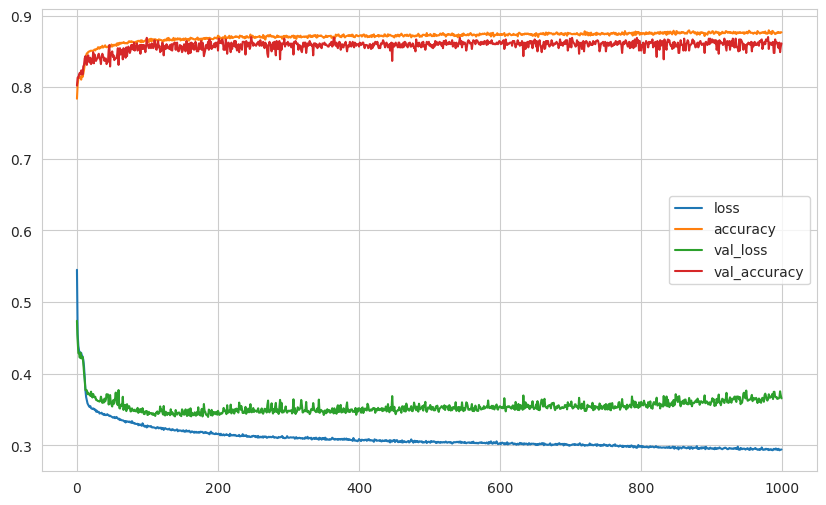

In [111]:
loss_df1.plot()
plt.show()

In [112]:
def con_matrix(X_train, X_test, y_train, y_test, model, model_name='model'):

  y_pred = (model.predict(X_test) > 0.5).astype('int64')
  print(f'{model_name} - Test Confusion Matrix\n' + '*' * 50)
  print(confusion_matrix(y_test, y_pred))
  print(classification_report(y_test, y_pred))

  print()

  y_train_pred = (model.predict(X_train) > 0.5).astype('int64')
  print(f'{model_name} - Train Confusion Matrix\n' + '*' * 50)
  print(confusion_matrix(y_train, y_train_pred))
  print(classification_report(y_train, y_train_pred))

In [113]:
loss1, accuracy1 = model1.evaluate(X_test, y_test, verbose=0)
print("model1 loss: ", loss1)
print("model1 accuracy: ", accuracy1)

model1 loss:  0.37196844816207886
model1 accuracy:  0.8519999980926514


In [114]:
con_matrix(X_train, X_test, y_train, y_test, model1, 'Adam_lr_0.001_1000epoch')

32/32 [==============================] - 0s 2ms/step
Adam_lr_0.001_1000epoch - Test Confusion Matrix
**************************************************
[[740  56]
 [ 92 112]]
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       796
           1       0.67      0.55      0.60       204

    accuracy                           0.85      1000
   macro avg       0.78      0.74      0.76      1000
weighted avg       0.84      0.85      0.85      1000


282/282 [==============================] - 1s 2ms/step
Adam_lr_0.001_1000epoch - Train Confusion Matrix
**************************************************
[[6811  351]
 [ 750 1083]]
              precision    recall  f1-score   support

           0       0.90      0.95      0.93      7162
           1       0.76      0.59      0.66      1833

    accuracy                           0.88      8995
   macro avg       0.83      0.77      0.79      8995
weighted avg       0.87      0.88      0.87

32/32 [==============================] - 0s 3ms/step


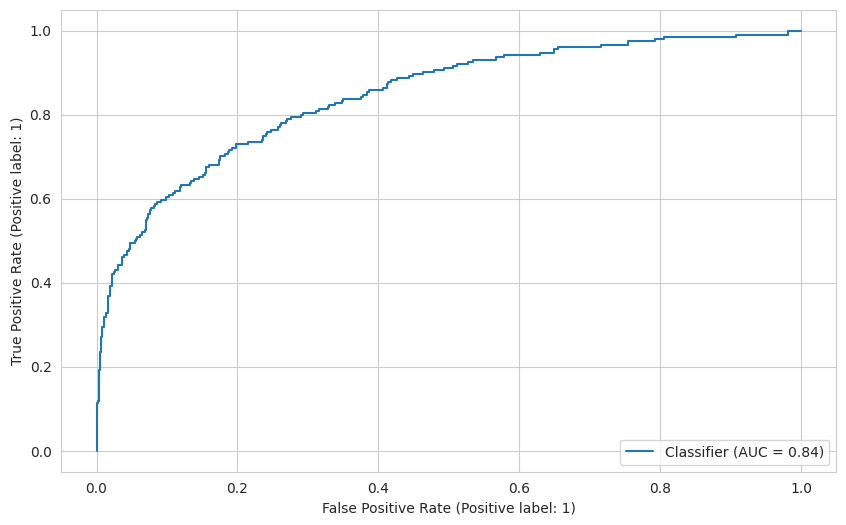

In [115]:
y_pred_proba1 = model1.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_proba1)

## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

### Create The Model

In [116]:
model2 = Sequential()

model2.add(Dense(18, activation="relu", input_dim=X_train.shape[1]))
model2.add(Dense(9, activation="relu"))
model2.add(Dense(4, activation="relu"))
model2.add(Dense(2, activation="relu"))
model2.add(Dense(1, activation="sigmoid"))
opt = Adam(learning_rate=0.001)
model2.compile(optimizer=opt, loss="binary_crossentropy", metrics=["accuracy"])

In [117]:
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(enumerate(class_weights))

In [118]:
model2.fit(x=X_train, y=y_train, validation_split=0.1, batch_size=32, epochs=1000, verbose=1, class_weight=class_weights_dict)

Epoch 1/1000
253/253 [==============================] - 3s 5ms/step - loss: 0.6862 - accuracy: 0.6726 - val_loss: 0.6199 - val_accuracy: 0.6800
Epoch 2/1000
253/253 [==============================] - 1s 5ms/step - loss: 0.6560 - accuracy: 0.6539 - val_loss: 0.5806 - val_accuracy: 0.6656
Epoch 3/1000
253/253 [==============================] - 1s 4ms/step - loss: 0.6370 - accuracy: 0.6551 - val_loss: 0.5853 - val_accuracy: 0.6411
Epoch 4/1000
253/253 [==============================] - 1s 5ms/step - loss: 0.6187 - accuracy: 0.6712 - val_loss: 0.5434 - val_accuracy: 0.6956
Epoch 5/1000
253/253 [==============================] - 2s 6ms/step - loss: 0.6016 - accuracy: 0.6941 - val_loss: 0.5365 - val_accuracy: 0.7000
Epoch 6/1000
253/253 [==============================] - 2s 6ms/step - loss: 0.5818 - accuracy: 0.7187 - val_loss: 0.5252 - val_accuracy: 0.7156
Epoch 7/1000
253/253 [==============================] - 2s 7ms/step - loss: 0.5609 - accuracy: 0.7293 - val_loss: 0.5625 - val_accuracy:

In [119]:
model2.save("scaler_churn_Adam_lr_0_001_1000epoch_cw.h5")

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [120]:
loss_df2 = pd.DataFrame(model2.history.history)
loss_df2.head()

,loss,accuracy,val_loss,val_accuracy
0,0.686,0.673,0.620,0.680
1,0.656,0.654,0.581,0.666
2,0.637,0.655,0.585,0.641
3,0.619,0.671,0.543,0.696
4,0.602,0.694,0.536,0.700


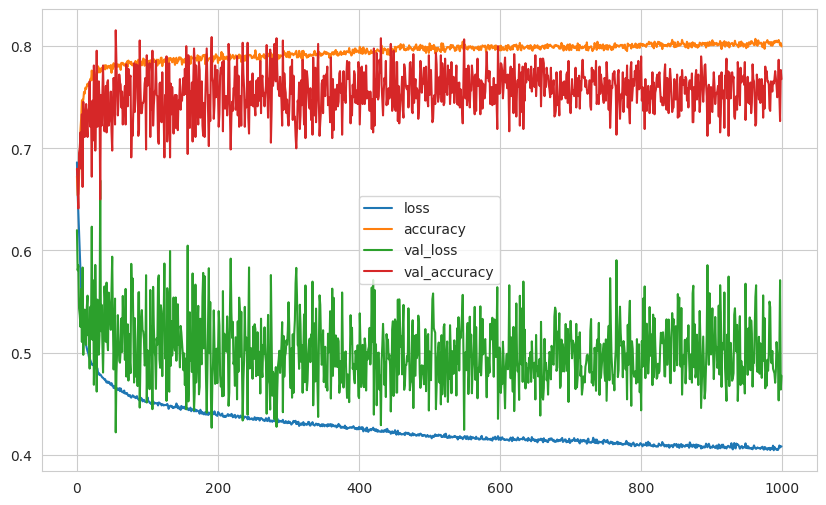

In [121]:
loss_df2.plot()
plt.show()

In [122]:
loss2, accuracy2 = model2.evaluate(X_test, y_test, verbose=0)
print("model2 loss: ", loss2)
print("model2 accuracy: ", accuracy2)

model2 loss:  0.4910584092140198
model2 accuracy:  0.7760000228881836


In [123]:
con_matrix(X_train, X_test, y_train, y_test, model2, 'Adam_lr_0.001_1000epoch_cw')

32/32 [==============================] - 0s 2ms/step
Adam_lr_0.001_1000epoch_cw - Test Confusion Matrix
**************************************************
[[629 167]
 [ 57 147]]
              precision    recall  f1-score   support

           0       0.92      0.79      0.85       796
           1       0.47      0.72      0.57       204

    accuracy                           0.78      1000
   macro avg       0.69      0.76      0.71      1000
weighted avg       0.83      0.78      0.79      1000


282/282 [==============================] - 1s 2ms/step
Adam_lr_0.001_1000epoch_cw - Train Confusion Matrix
**************************************************
[[5867 1295]
 [ 383 1450]]
              precision    recall  f1-score   support

           0       0.94      0.82      0.87      7162
           1       0.53      0.79      0.63      1833

    accuracy                           0.81      8995
   macro avg       0.73      0.81      0.75      8995
weighted avg       0.86      0.81    

32/32 [==============================] - 0s 2ms/step


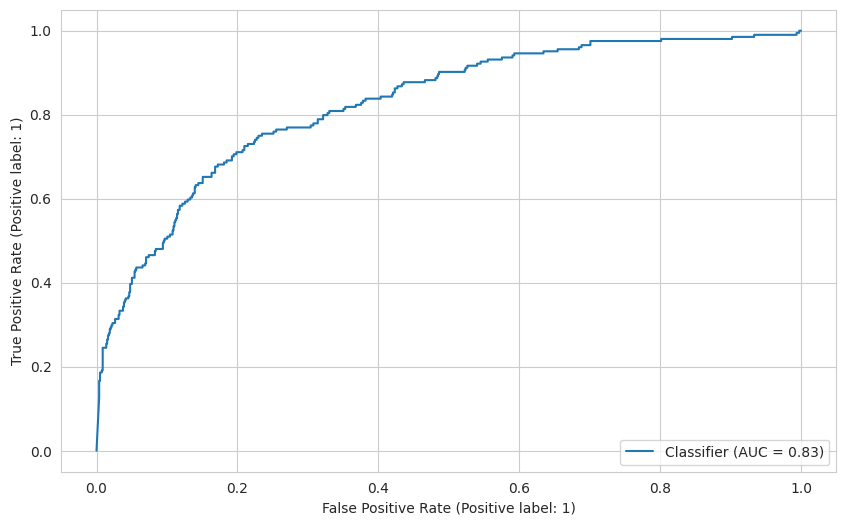

In [124]:
y_pred_proba2 = model2.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_proba2)

## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method

### Increase The Learning Rate and Observe The Results

In [125]:
model3 = Sequential()

model3.add(Dense(18, activation="relu", input_dim=X_train.shape[1]))
model3.add(Dense(9, activation="relu"))
model3.add(Dense(4, activation="relu"))
model3.add(Dense(2, activation="relu"))
model3.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate=0.003)

model3.compile(optimizer=opt, loss="binary_crossentropy", metrics=["accuracy"])

In [126]:
model3.fit(x=X_train, y=y_train, validation_split=0.1, batch_size=32, epochs=1000, verbose=1, class_weight=class_weights_dict)

Epoch 1/1000
253/253 [==============================] - 3s 5ms/step - loss: 0.6429 - accuracy: 0.6525 - val_loss: 0.6403 - val_accuracy: 0.6511
Epoch 2/1000
253/253 [==============================] - 2s 6ms/step - loss: 0.5988 - accuracy: 0.6909 - val_loss: 0.6175 - val_accuracy: 0.6733
Epoch 3/1000
253/253 [==============================] - 2s 7ms/step - loss: 0.5849 - accuracy: 0.6994 - val_loss: 0.5722 - val_accuracy: 0.7067
Epoch 4/1000
253/253 [==============================] - 2s 6ms/step - loss: 0.5698 - accuracy: 0.7174 - val_loss: 0.5436 - val_accuracy: 0.7400
Epoch 5/1000
253/253 [==============================] - 1s 4ms/step - loss: 0.5310 - accuracy: 0.7536 - val_loss: 0.6051 - val_accuracy: 0.6989
Epoch 6/1000
253/253 [==============================] - 1s 4ms/step - loss: 0.5080 - accuracy: 0.7650 - val_loss: 0.5369 - val_accuracy: 0.7556
Epoch 7/1000
253/253 [==============================] - 1s 4ms/step - loss: 0.4929 - accuracy: 0.7687 - val_loss: 0.5416 - val_accuracy:

In [127]:
model3.save("scaler_churn_Adamm_lr_0_003_1000epoch_cw.h5")

In [128]:
loss_df3 = pd.DataFrame(model3.history.history)
loss_df3.head()

,loss,accuracy,val_loss,val_accuracy
0,0.643,0.653,0.640,0.651
1,0.599,0.691,0.618,0.673
2,0.585,0.699,0.572,0.707
3,0.570,0.717,0.544,0.740
4,0.531,0.754,0.605,0.699


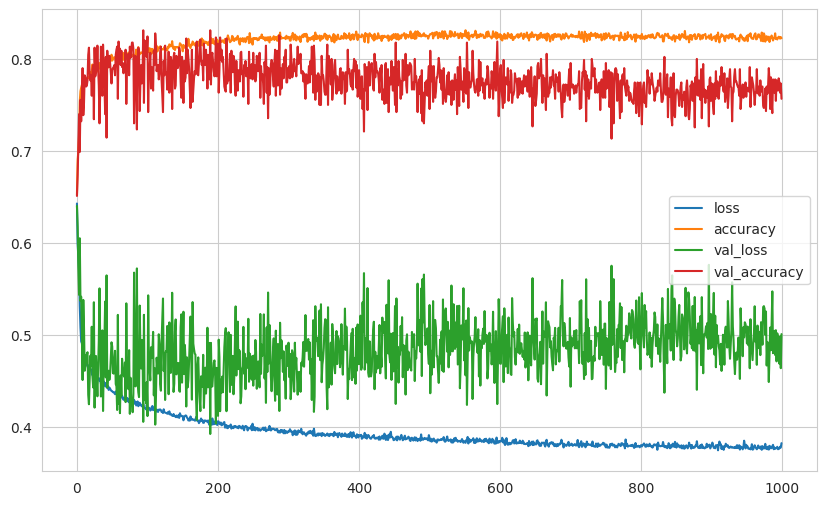

In [129]:
loss_df3.plot()
plt.show()

In [130]:
loss3, accuracy3 = model3.evaluate(X_test, y_test, verbose=0)
print("model1 loss: ", loss3)
print("model1 accuracy: ", accuracy3)

model1 loss:  0.5267265439033508
model1 accuracy:  0.7549999952316284


In [131]:
con_matrix(X_train, X_test, y_train, y_test, model3, 'Adam_lr_0.003_1000epoch_cw')

32/32 [==============================] - 0s 3ms/step
Adam_lr_0.003_1000epoch_cw - Test Confusion Matrix
**************************************************
[[612 184]
 [ 61 143]]
              precision    recall  f1-score   support

           0       0.91      0.77      0.83       796
           1       0.44      0.70      0.54       204

    accuracy                           0.76      1000
   macro avg       0.67      0.73      0.69      1000
weighted avg       0.81      0.76      0.77      1000


282/282 [==============================] - 1s 3ms/step
Adam_lr_0.003_1000epoch_cw - Train Confusion Matrix
**************************************************
[[5780 1382]
 [ 296 1537]]
              precision    recall  f1-score   support

           0       0.95      0.81      0.87      7162
           1       0.53      0.84      0.65      1833

    accuracy                           0.81      8995
   macro avg       0.74      0.82      0.76      8995
weighted avg       0.86      0.81    

32/32 [==============================] - 0s 2ms/step


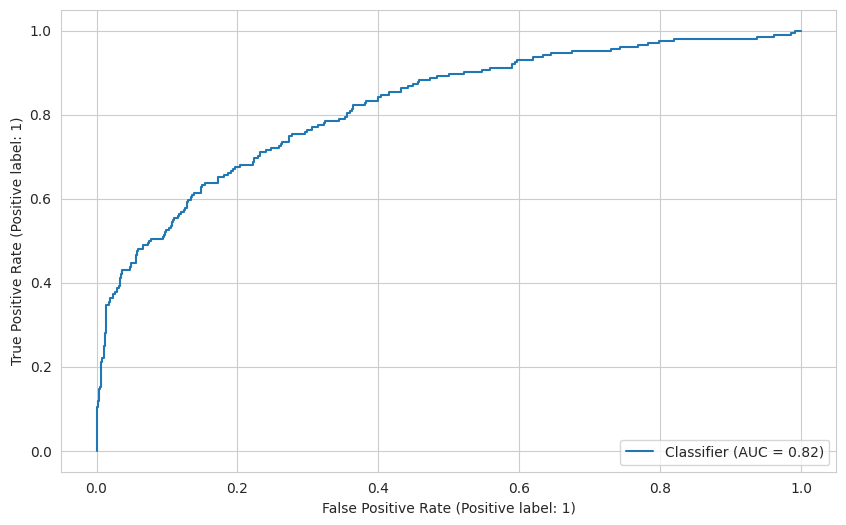

In [132]:
y_pred_proba3 = model3.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_proba3)

### Add Dropout Layer

In [135]:
model4 = Sequential()

model4.add(Dense(18, activation="relu", input_dim=X_train.shape[1]))
model4.add(Dropout(0.5))

model4.add(Dense(9, activation="relu"))
model4.add(Dropout(0.5))

model4.add(Dense(4, activation="relu"))
model4.add(Dropout(0.5))

model4.add(Dense(2, activation="relu"))
model4.add(Dropout(0.5))

model4.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate=0.003)
model4.compile(optimizer=opt, loss="binary_crossentropy", metrics=["accuracy"])

In [136]:
model4.fit(x=X_train, y=y_train, validation_split=0.1, batch_size=32, epochs=1000, verbose=1, class_weight=class_weights_dict)

Epoch 1/1000
253/253 [==============================] - 5s 8ms/step - loss: 0.7015 - accuracy: 0.7576 - val_loss: 0.6874 - val_accuracy: 0.8022
Epoch 2/1000
253/253 [==============================] - 2s 7ms/step - loss: 0.6923 - accuracy: 0.7197 - val_loss: 0.6871 - val_accuracy: 0.8000
Epoch 3/1000
253/253 [==============================] - 1s 5ms/step - loss: 0.6934 - accuracy: 0.7438 - val_loss: 0.6855 - val_accuracy: 0.8022
Epoch 4/1000
253/253 [==============================] - 1s 5ms/step - loss: 0.6919 - accuracy: 0.7647 - val_loss: 0.6863 - val_accuracy: 0.8022
Epoch 5/1000
253/253 [==============================] - 1s 5ms/step - loss: 0.6884 - accuracy: 0.7140 - val_loss: 0.6967 - val_accuracy: 0.3267
Epoch 6/1000
253/253 [==============================] - 1s 5ms/step - loss: 0.6869 - accuracy: 0.7141 - val_loss: 0.6751 - val_accuracy: 0.7833
Epoch 7/1000
253/253 [==============================] - 1s 5ms/step - loss: 0.6846 - accuracy: 0.7575 - val_loss: 0.6746 - val_accuracy:

In [137]:
model4.save("scaler_churn_Adam_lr_0_003_1000epoch_dropout_cw.h5")

In [138]:
loss_df4 = pd.DataFrame(model4.history.history)
loss_df4.head()

,loss,accuracy,val_loss,val_accuracy
0,0.701,0.758,0.687,0.802
1,0.692,0.720,0.687,0.800
2,0.693,0.744,0.686,0.802
3,0.692,0.765,0.686,0.802
4,0.688,0.714,0.697,0.327


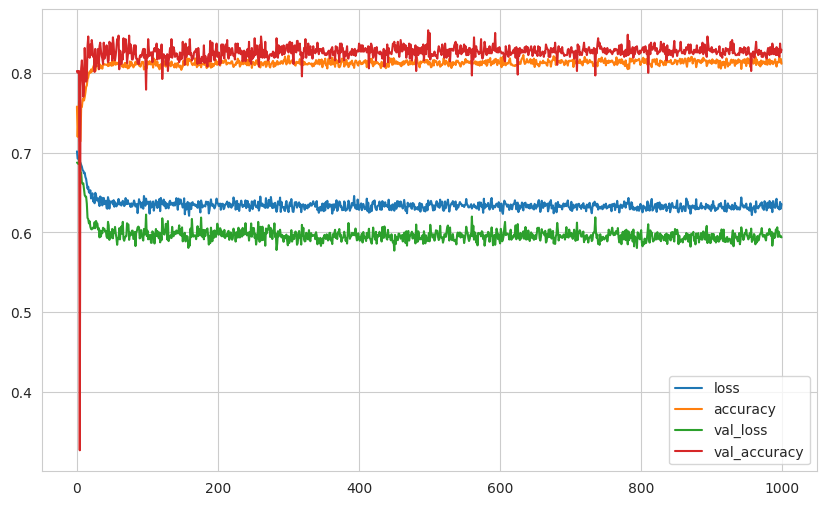

In [139]:
loss_df4.plot()
plt.show()

In [140]:
loss4, accuracy4 = model4.evaluate(X_test, y_test, verbose=0)
print("model4 loss: ", loss4)
print("model4 accuracy: ", accuracy4)

model4 loss:  0.5872945189476013
model4 accuracy:  0.8420000076293945


In [141]:
con_matrix(X_train, X_test, y_train, y_test, model4, 'Adam_lr_0.003_1000epoch_dropout_cw')

32/32 [==============================] - 0s 2ms/step
Adam_lr_0.003_1000epoch_dropout_cw - Test Confusion Matrix
**************************************************
[[734  62]
 [ 96 108]]
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       796
           1       0.64      0.53      0.58       204

    accuracy                           0.84      1000
   macro avg       0.76      0.73      0.74      1000
weighted avg       0.83      0.84      0.84      1000


282/282 [==============================] - 1s 2ms/step
Adam_lr_0.003_1000epoch_dropout_cw - Train Confusion Matrix
**************************************************
[[6648  514]
 [ 828 1005]]
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      7162
           1       0.66      0.55      0.60      1833

    accuracy                           0.85      8995
   macro avg       0.78      0.74      0.75      8995
weighted avg       0.

32/32 [==============================] - 0s 2ms/step


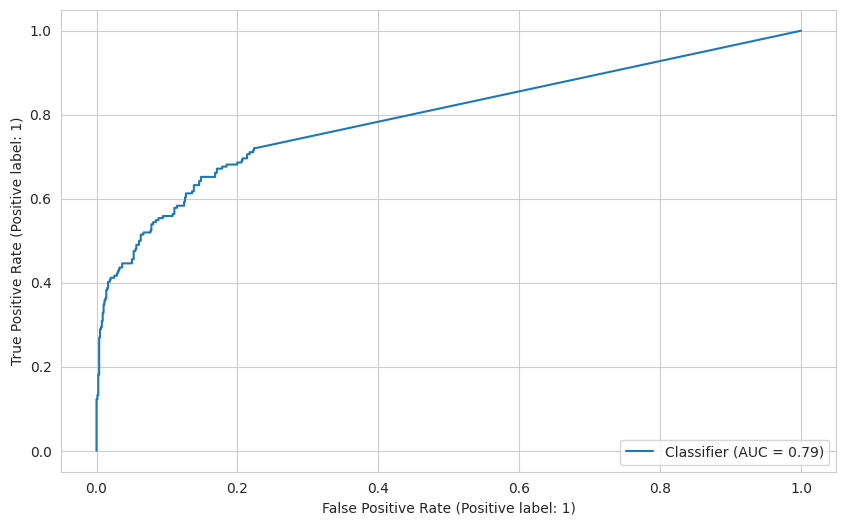

In [142]:
y_pred_proba4 = model4.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_proba4)

### Add Early Stop

#### Monitor the "val_loss" as metric

In [144]:
model5 = Sequential()

model5.add(Dense(18, activation="relu", input_dim=X_train.shape[1]))
model5.add(Dense(9, activation="relu"))
model5.add(Dense(4, activation="relu"))
model5.add(Dense(2, activation="relu"))
model5.add(Dense(1, activation="sigmoid"))
opt = Adam(learning_rate=0.001)
model5.compile(optimizer=opt, loss="binary_crossentropy", metrics=["accuracy"])

In [152]:
early_stop1 = EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience=25, restore_best_weights=True)

In [153]:
model5.fit(x=X_train, y=y_train, validation_split=0.1, batch_size=32, epochs=1000, verbose=1, class_weight=class_weights_dict, callbacks=[early_stop1])

Epoch 1/1000
253/253 [==============================] - 1s 4ms/step - loss: 0.4898 - accuracy: 0.7715 - val_loss: 0.5241 - val_accuracy: 0.7367
Epoch 2/1000
253/253 [==============================] - 1s 4ms/step - loss: 0.4886 - accuracy: 0.7691 - val_loss: 0.4892 - val_accuracy: 0.7633
Epoch 3/1000
253/253 [==============================] - 1s 4ms/step - loss: 0.4864 - accuracy: 0.7718 - val_loss: 0.5091 - val_accuracy: 0.7478
Epoch 4/1000
253/253 [==============================] - 1s 4ms/step - loss: 0.4856 - accuracy: 0.7722 - val_loss: 0.5396 - val_accuracy: 0.7311
Epoch 5/1000
253/253 [==============================] - 1s 4ms/step - loss: 0.4828 - accuracy: 0.7729 - val_loss: 0.5217 - val_accuracy: 0.7489
Epoch 6/1000
253/253 [==============================] - 1s 4ms/step - loss: 0.4847 - accuracy: 0.7695 - val_loss: 0.5304 - val_accuracy: 0.7356
Epoch 7/1000
253/253 [==============================] - 1s 4ms/step - loss: 0.4799 - accuracy: 0.7749 - val_loss: 0.5097 - val_accuracy:

In [154]:
model5.save("scaler_churn_Adam_lr_0_001_1000epoch_earlystop_cw.h5")

In [155]:
loss_df5 = pd.DataFrame(model5.history.history)
loss_df5.head()

,loss,accuracy,val_loss,val_accuracy
0,0.490,0.771,0.524,0.737
1,0.489,0.769,0.489,0.763
2,0.486,0.772,0.509,0.748
3,0.486,0.772,0.540,0.731
4,0.483,0.773,0.522,0.749


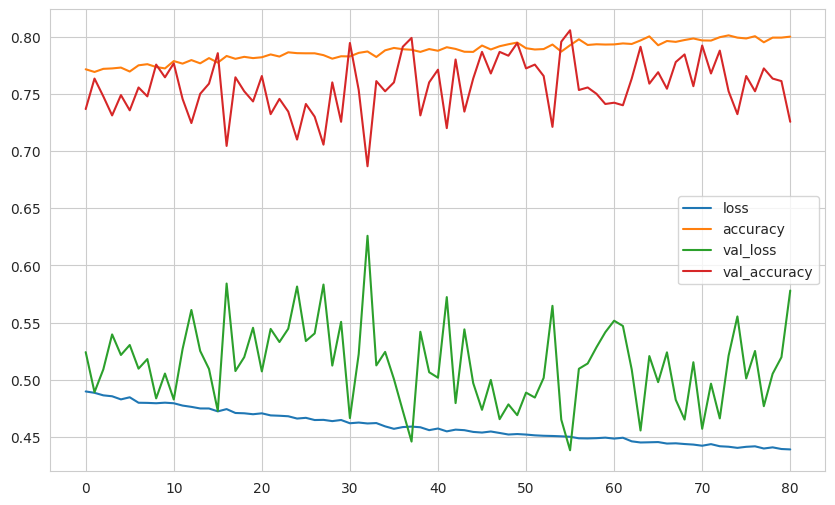

In [156]:
loss_df5.plot()
plt.show()

In [157]:
loss5, accuracy5 = model5.evaluate(X_test, y_test, verbose=0)
print("model5 loss: ", loss5)
print("model5 accuracy: ", accuracy5)

model5 loss:  0.41990742087364197
model5 accuracy:  0.8019999861717224


In [159]:
con_matrix(X_train, X_test, y_train, y_test, model5, 'Adam_lr_0.001_1000epoch_earlystop_cw')

32/32 [==============================] - 0s 2ms/step
Adam_lr_0.001_1000epoch_earlystop_cw - Test Confusion Matrix
**************************************************
[[667 129]
 [ 69 135]]
              precision    recall  f1-score   support

           0       0.91      0.84      0.87       796
           1       0.51      0.66      0.58       204

    accuracy                           0.80      1000
   macro avg       0.71      0.75      0.72      1000
weighted avg       0.83      0.80      0.81      1000


282/282 [==============================] - 1s 4ms/step
Adam_lr_0.001_1000epoch_earlystop_cw - Train Confusion Matrix
**************************************************
[[6180  982]
 [ 550 1283]]
              precision    recall  f1-score   support

           0       0.92      0.86      0.89      7162
           1       0.57      0.70      0.63      1833

    accuracy                           0.83      8995
   macro avg       0.74      0.78      0.76      8995
weighted avg     

32/32 [==============================] - 0s 2ms/step


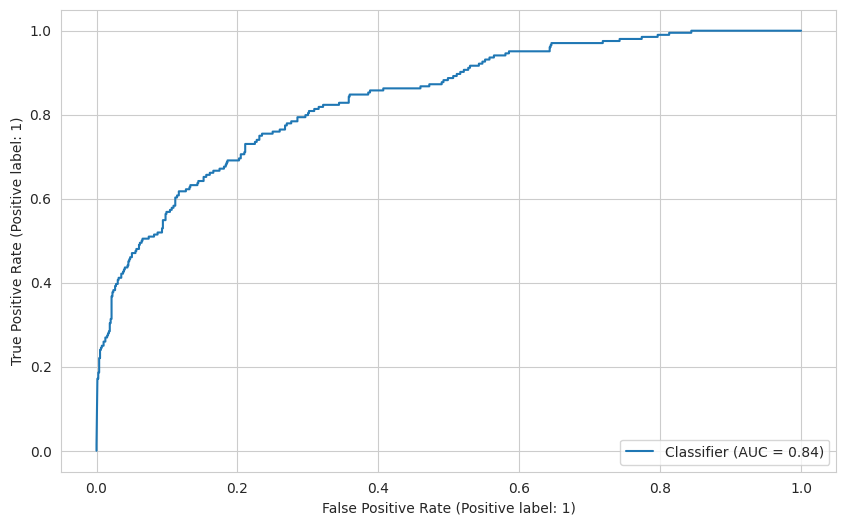

In [160]:
y_pred_proba5 = model5.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_proba5)

#### Monitor the "val_recall" as metric

In [206]:
model6 = Sequential()

model6.add(Dense(18, activation="relu", input_dim=X_train.shape[1]))
model6.add(Dense(9, activation="relu"))
model6.add(Dense(4, activation="relu"))
model6.add(Dense(2, activation="relu"))
model6.add(Dense(1, activation="sigmoid"))
opt = Adam(learning_rate=0.001)

model6.compile(optimizer=opt, loss="binary_crossentropy", metrics=['Recall'])

In [207]:
early_stop2 = EarlyStopping(monitor="val_recall", mode="max", verbose=1, patience=25, restore_best_weights=True)

In [208]:
model6.fit(x=X_train, y=y_train, validation_split=0.1, batch_size=32, epochs=1000, verbose=1, class_weight=class_weights_dict, callbacks=[early_stop2])

Epoch 1/1000
253/253 [==============================] - 3s 5ms/step - loss: 0.6832 - recall: 0.8610 - val_loss: 0.6949 - val_recall: 0.7191
Epoch 2/1000
253/253 [==============================] - 1s 5ms/step - loss: 0.6270 - recall: 0.6900 - val_loss: 0.6697 - val_recall: 0.7360
Epoch 3/1000
253/253 [==============================] - 1s 4ms/step - loss: 0.5844 - recall: 0.6852 - val_loss: 0.6378 - val_recall: 0.7247
Epoch 4/1000
253/253 [==============================] - 1s 4ms/step - loss: 0.5625 - recall: 0.7069 - val_loss: 0.5864 - val_recall: 0.7247
Epoch 5/1000
253/253 [==============================] - 1s 5ms/step - loss: 0.5434 - recall: 0.7136 - val_loss: 0.5375 - val_recall: 0.6966
Epoch 6/1000
253/253 [==============================] - 1s 5ms/step - loss: 0.5292 - recall: 0.7269 - val_loss: 0.4677 - val_recall: 0.6011
Epoch 7/1000
253/253 [==============================] - 2s 6ms/step - loss: 0.5167 - recall: 0.7317 - val_loss: 0.5653 - val_recall: 0.7472
Epoch 8/1000
253/253

In [209]:
model6.save("scaler_churn_Adam_lr_0_001_1000epoch_earlystop2_cw.h5")

In [214]:
loss_df6 = pd.DataFrame(model6.history.history)
loss_df6.head()

,loss,recall,val_loss,val_recall
0,0.683,0.861,0.695,0.719
1,0.627,0.690,0.670,0.736
2,0.584,0.685,0.638,0.725
3,0.563,0.707,0.586,0.725
4,0.543,0.714,0.538,0.697


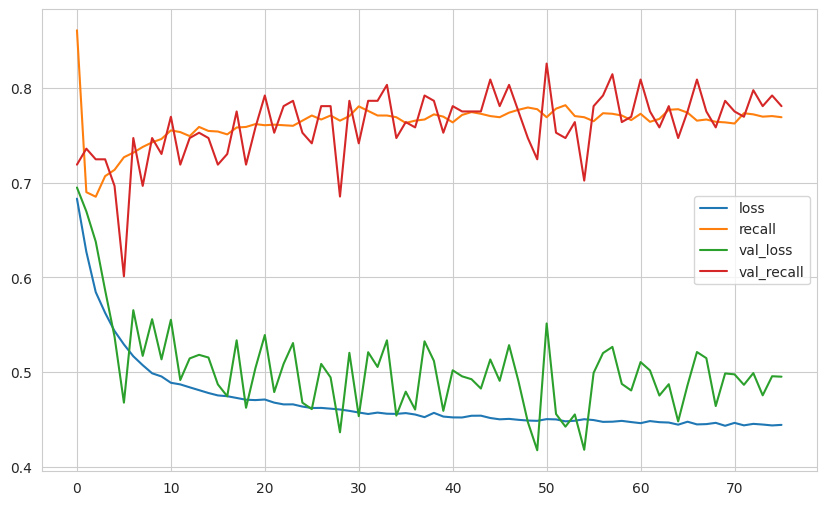

In [215]:
loss_df6.plot()
plt.show()

In [216]:
loss6, recall6 = model6.evaluate(X_test, y_test, verbose=0)
print("model6 loss: ", loss6)
print("model6 recall: ", recall6)

model6 loss:  0.5371057391166687
model6 recall:  0.8186274766921997


In [231]:
con_matrix(X_train, X_test, y_train, y_test, model6, 'Adam_lr_0.001_1000epoch_earlystop2_cw')

32/32 [==============================] - 0s 2ms/step
Adam_lr_0.001_1000epoch_earlystop2_cw - Test Confusion Matrix
**************************************************
[[558 238]
 [ 37 167]]
              precision    recall  f1-score   support

           0       0.94      0.70      0.80       796
           1       0.41      0.82      0.55       204

    accuracy                           0.73      1000
   macro avg       0.68      0.76      0.68      1000
weighted avg       0.83      0.72      0.75      1000


282/282 [==============================] - 1s 2ms/step
Adam_lr_0.001_1000epoch_earlystop2_cw - Train Confusion Matrix
**************************************************
[[5190 1972]
 [ 300 1533]]
              precision    recall  f1-score   support

           0       0.95      0.72      0.82      7162
           1       0.44      0.84      0.57      1833

    accuracy                           0.75      8995
   macro avg       0.69      0.78      0.70      8995
weighted avg   

32/32 [==============================] - 0s 2ms/step


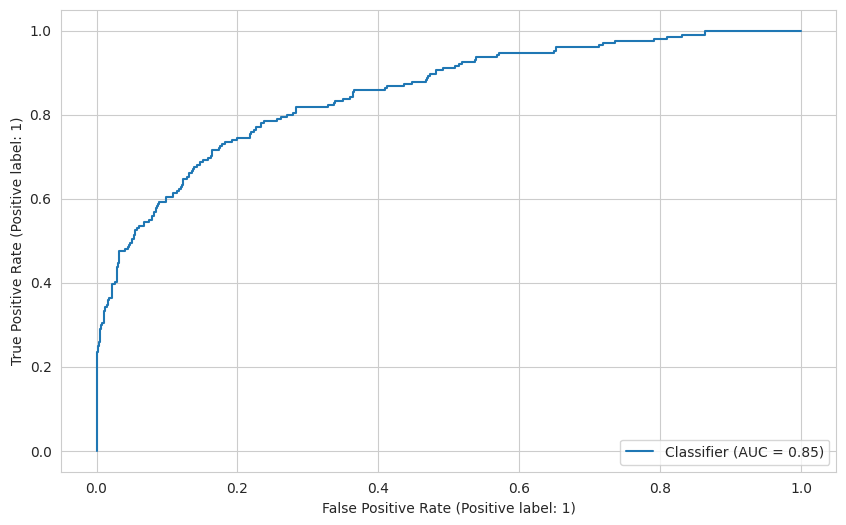

In [218]:
y_pred_proba6 = model6.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_proba6)

## Optuna

In [203]:
trial_metric = "accuracy"
batch_size = 64


def create_model(trial):

    n_units1 = trial.suggest_int("n_units1", 11, 121)
    n_units2 = trial.suggest_int("n_units2", 11, 121)
    n_units3 = trial.suggest_int("n_units3", 11, 121)
    n_units4 = trial.suggest_int("n_units4", 11, 121)

    optimizer = trial.suggest_categorical("optimizer", [Adam, Adadelta, RMSprop, Nadam])

    learning_rate = trial.suggest_loguniform("learning_rate", 1e-5, 1e-1)

    model = Sequential()
    model.add(Dense(n_units1, input_dim=X_train.shape[1], activation="relu"))
    model.add(Dense(n_units2, activation="relu"))
    model.add(Dense(n_units3, activation="relu"))
    model.add(Dense(n_units4, activation="relu"))

    model.add(Dense(1, activation="sigmoid"))

    model.compile(
        loss="binary_crossentropy",
        optimizer=optimizer(learning_rate=learning_rate),
        metrics=[trial_metric]
    )
    return model


def objective(trial):
    model = create_model(trial)
    w0 = trial.suggest_loguniform("w0", 0.01, 3)
    w1 = trial.suggest_loguniform("w1", 0.01, 3)
    model.fit(
        X_train,
        y_train,
        validation_data=(X_test, y_test),
        batch_size=batch_size,
        epochs=500,
        callbacks=[early_stop1],
        class_weight={0: w0, 1: w1},
        verbose=0,
    )

    score = model.evaluate(X_test, y_test, verbose=0)[1]
    return score

In [204]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=10)
study.best_params

[I 2023-11-13 18:54:42,149] A new study created in memory with name: no-name-2a808dbc-37b8-4305-b5d3-3aae7c31ad19
[I 2023-11-13 19:00:05,056] Trial 0 finished with value: 0.7960000038146973 and parameters: {'n_units1': 84, 'n_units2': 13, 'n_units3': 12, 'n_units4': 41, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 2.2901270218874735e-05, 'w0': 0.28646078079118664, 'w1': 0.027046153144326332}. Best is trial 0 with value: 0.7960000038146973.


Restoring model weights from the end of the best epoch: 10.
Epoch 35: early stopping


[I 2023-11-13 19:00:47,388] Trial 1 finished with value: 0.6499999761581421 and parameters: {'n_units1': 97, 'n_units2': 41, 'n_units3': 12, 'n_units4': 26, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.0014482015858602122, 'w0': 0.06948715569458941, 'w1': 0.8458851570901791}. Best is trial 0 with value: 0.7960000038146973.


Restoring model weights from the end of the best epoch: 46.
Epoch 71: early stopping


[I 2023-11-13 19:02:10,142] Trial 2 finished with value: 0.8550000190734863 and parameters: {'n_units1': 113, 'n_units2': 41, 'n_units3': 35, 'n_units4': 56, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.000671761156809549, 'w0': 1.088422261396681, 'w1': 1.6838433304475835}. Best is trial 2 with value: 0.8550000190734863.
[I 2023-11-13 19:08:03,524] Trial 3 finished with value: 0.7770000100135803 and parameters: {'n_units1': 66, 'n_units2': 62, 'n_units3': 58, 'n_units4': 45, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 1.1689924806081253e-05, 'w0': 1.3301020789386764, 'w1': 0.01592241964003584}. Best is trial 2 with value: 0.8550000190734863.


Restoring model weights from the end of the best epoch: 26.
Epoch 51: early stopping


[I 2023-11-13 19:08:34,449] Trial 4 finished with value: 0.859000027179718 and parameters: {'n_units1': 61, 'n_units2': 121, 'n_units3': 52, 'n_units4': 40, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.002330879555155974, 'w0': 0.16530226419175098, 'w1': 0.09902095852859828}. Best is trial 4 with value: 0.859000027179718.


Restoring model weights from the end of the best epoch: 9.
Epoch 34: early stopping


[I 2023-11-13 19:09:16,765] Trial 5 finished with value: 0.7960000038146973 and parameters: {'n_units1': 48, 'n_units2': 15, 'n_units3': 120, 'n_units4': 18, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 1.388912339928179e-05, 'w0': 0.5139697183366705, 'w1': 0.17022382929058488}. Best is trial 4 with value: 0.859000027179718.


Restoring model weights from the end of the best epoch: 317.
Epoch 342: early stopping


[I 2023-11-13 19:13:40,138] Trial 6 finished with value: 0.8019999861717224 and parameters: {'n_units1': 47, 'n_units2': 107, 'n_units3': 70, 'n_units4': 111, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 1.2918430814479506e-05, 'w0': 0.14472100642843685, 'w1': 0.37571356175065074}. Best is trial 4 with value: 0.859000027179718.


Restoring model weights from the end of the best epoch: 8.
Epoch 33: early stopping


[I 2023-11-13 19:14:22,054] Trial 7 finished with value: 0.7960000038146973 and parameters: {'n_units1': 58, 'n_units2': 35, 'n_units3': 37, 'n_units4': 37, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.005748297090695049, 'w0': 0.6613049093504321, 'w1': 0.020946616891457753}. Best is trial 4 with value: 0.859000027179718.


Restoring model weights from the end of the best epoch: 16.
Epoch 41: early stopping


[I 2023-11-13 19:14:47,422] Trial 8 finished with value: 0.8330000042915344 and parameters: {'n_units1': 19, 'n_units2': 88, 'n_units3': 56, 'n_units4': 112, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.00538003510699625, 'w0': 0.047402726688385806, 'w1': 0.20238511837196044}. Best is trial 4 with value: 0.859000027179718.


Restoring model weights from the end of the best epoch: 4.
Epoch 29: early stopping


[I 2023-11-13 19:15:08,967] Trial 9 finished with value: 0.7960000038146973 and parameters: {'n_units1': 101, 'n_units2': 84, 'n_units3': 55, 'n_units4': 91, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.010944982572279336, 'w0': 0.38150548735204104, 'w1': 0.029712335946406696}. Best is trial 4 with value: 0.859000027179718.


{'n_units1': 61,
 'n_units2': 121,
 'n_units3': 52,
 'n_units4': 40,
 'optimizer': keras.src.optimizers.rmsprop.RMSprop,
 'learning_rate': 0.002330879555155974,
 'w0': 0.16530226419175098,
 'w1': 0.09902095852859828}

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [220]:
unit1, unit2, unit3, unit4, optimizer, lr, w0, w1 = (
    study.best_params["n_units1"],
    study.best_params["n_units2"],
    study.best_params["n_units3"],
    study.best_params["n_units4"],
    study.best_params["optimizer"],
    study.best_params["learning_rate"],
    study.best_params["w0"],
    study.best_params["w1"],
)

model7 = Sequential()
model7.add(Dense(unit1, activation="relu"))
model7.add(Dense(unit2, activation="relu"))
model7.add(Dense(unit3, activation="relu"))
model7.add(Dense(unit4, activation="relu"))
model7.add(Dense(1, activation="sigmoid"))
opt = optimizer(learning_rate=lr)
model7.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])

# train model
model7.fit(
    X_train,
    y_train,
    validation_split=0.1,
    batch_size=64,
    epochs=100,
    callbacks=[early_stop1],
    verbose=1,
)

Epoch 1/100
127/127 [==============================] - 3s 9ms/step - loss: 0.4668 - recall: 0.0985 - val_loss: 0.4298 - val_recall: 0.1742
Epoch 2/100
127/127 [==============================] - 1s 7ms/step - loss: 0.4156 - recall: 0.3076 - val_loss: 0.4232 - val_recall: 0.5618
Epoch 3/100
127/127 [==============================] - 1s 5ms/step - loss: 0.3767 - recall: 0.4060 - val_loss: 0.4358 - val_recall: 0.6404
Epoch 4/100
127/127 [==============================] - 1s 5ms/step - loss: 0.3663 - recall: 0.4097 - val_loss: 0.3529 - val_recall: 0.3820
Epoch 5/100
127/127 [==============================] - 1s 5ms/step - loss: 0.3576 - recall: 0.4230 - val_loss: 0.3945 - val_recall: 0.2921
Epoch 6/100
127/127 [==============================] - 1s 5ms/step - loss: 0.3497 - recall: 0.4356 - val_loss: 0.3815 - val_recall: 0.3876
Epoch 7/100
127/127 [==============================] - 1s 4ms/step - loss: 0.3486 - recall: 0.4562 - val_loss: 0.3682 - val_recall: 0.5337
Epoch 8/100
127/127 [======

In [221]:
loss_df7 = pd.DataFrame(model7.history.history)
loss_df7.head()

,loss,recall,val_loss,val_recall
0,0.467,0.098,0.430,0.174
1,0.416,0.308,0.423,0.562
2,0.377,0.406,0.436,0.640
3,0.366,0.410,0.353,0.382
4,0.358,0.423,0.394,0.292


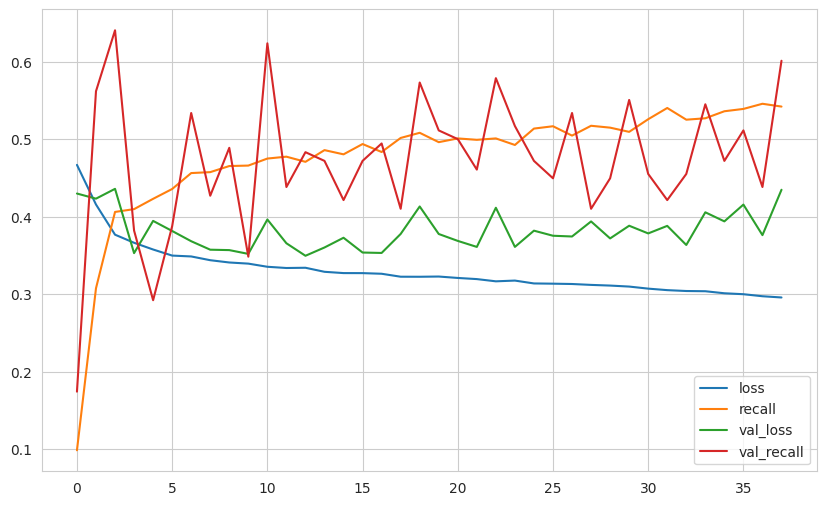

In [222]:
loss_df7.plot()
plt.show()

In [224]:
loss7, recall7 = model7.evaluate(X_test, y_test, verbose=0)
print("model7 loss: ", loss7)
print("model7 recall: ", recall7)

model7 loss:  0.35550716519355774
model7 recall:  0.4362744987010956


In [225]:
con_matrix(X_train, X_test, y_train, y_test, model7, 'RMSprop_lr_0.002_1000epoch_earlystop_cw')

32/32 [==============================] - 0s 3ms/step
RMSprop_lr_0.002_1000epoch_earlystop_cw - Test Confusion Matrix
**************************************************
[[766  30]
 [115  89]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       796
           1       0.75      0.44      0.55       204

    accuracy                           0.85      1000
   macro avg       0.81      0.70      0.73      1000
weighted avg       0.84      0.85      0.84      1000


282/282 [==============================] - 1s 2ms/step
RMSprop_lr_0.002_1000epoch_earlystop_cw - Train Confusion Matrix
**************************************************
[[6925  237]
 [ 954  879]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      7162
           1       0.79      0.48      0.60      1833

    accuracy                           0.87      8995
   macro avg       0.83      0.72      0.76      8995
weighted av

32/32 [==============================] - 0s 2ms/step


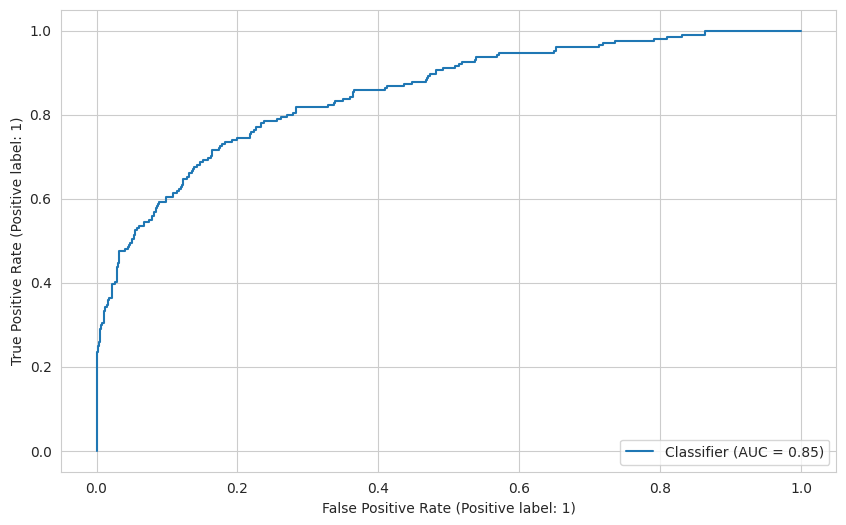

In [226]:
y_pred_proba6 = model6.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_proba6)

# Final Model and Model Deployment

In [236]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_auc_score, accuracy_score, recall_score, f1_score

In [239]:
models = [model1, model2, model3, model4, model5, model6, model7]
model_names = ['Model1', 'Model2', 'Model3', 'Model4', 'Model5', 'Model6', 'Model7']

metrics_df = pd.DataFrame(columns=['Model', 'AUC', 'Accuracy'])


for model, model_name in zip(models, model_names):
    y_pred = model.predict(X_test)
    auc_score = roc_auc_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, (y_pred > 0.5).astype(int))
    recall = recall_score(y_test, (y_pred > 0.5).astype(int))
    f1 = f1_score(y_test, (y_pred > 0.5).astype(int))

    metrics_df = metrics_df.append({'Model': model_name, 'AUC': auc_score, 'Accuracy': accuracy, 'Recall': recall, 'F1 Score': f1}, ignore_index=True)

metrics_df

32/32 [==============================] - 0s 2ms/step


,Model,AUC,Accuracy,Recall,F1 Score
0,Model1,0.844,0.852,0.549,0.602
1,Model2,0.826,0.776,0.721,0.568
2,Model3,0.819,0.755,0.701,0.539
3,Model4,0.793,0.842,0.529,0.578
4,Model5,0.835,0.771,0.711,0.559
5,Model6,0.851,0.725,0.819,0.548
6,Model7,0.847,0.855,0.436,0.551


In [241]:
model6.save("model_churn.h5")

## Prediction

In [242]:
pickle.dump(scaler, open("scaler_churn", "wb"))

In [243]:
model_churn = load_model("model_churn.h5")

scaler_churn = pickle.load(open("scaler_churn", "rb"))

In [244]:
df_predict.head()

,rownumber,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
6252,6253,15687492,Anderson,596,Germany,Male,32,3,96709.070,2,0,0,41788.370,0
4684,4685,15736963,Herring,623,France,Male,43,1,0.000,2,1,1,146379.300,0
1731,1732,15721730,Amechi,601,Spain,Female,44,4,0.000,2,1,0,58561.310,0
4742,4743,15762134,Liang,506,Germany,Male,59,8,119152.100,2,1,1,170679.740,0
4521,4522,15648898,Chuang,560,Spain,Female,27,7,124995.980,1,1,1,114669.790,0


In [245]:
df_predict_transform = transform_df(df_predict)
df_predict_transform.head()

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,germany,spain,female
6252,596,32,3,96709.070,2,0,0,41788.370,0,1,0,0
4684,623,43,1,0.000,2,1,1,146379.300,0,0,0,0
1731,601,44,4,0.000,2,1,0,58561.310,0,0,1,1
4742,506,59,8,119152.100,2,1,1,170679.740,0,1,0,0
4521,560,27,7,124995.980,1,1,1,114669.790,0,0,1,1


In [247]:
X_new = df_predict_transform.drop(['exited'], axis=1)
y_new = df_predict_transform['exited']

In [250]:
X_new_scale = scaler_churn.transform(X_new)

In [251]:
X_new_scale

array([[5.9600000e+02, 3.2000000e+01, 3.0000000e+00, 9.6709070e+04,
        2.0000000e+00, 0.0000000e+00, 0.0000000e+00, 4.1788370e+04,
        1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [6.2300000e+02, 4.3000000e+01, 1.0000000e+00, 0.0000000e+00,
        2.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.4637930e+05,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [6.0100000e+02, 4.4000000e+01, 4.0000000e+00, 0.0000000e+00,
        2.0000000e+00, 1.0000000e+00, 0.0000000e+00, 5.8561310e+04,
        0.0000000e+00, 1.0000000e+00, 1.0000000e+00],
       [5.0600000e+02, 5.9000000e+01, 8.0000000e+00, 1.1915210e+05,
        2.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.7067974e+05,
        1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [5.6000000e+02, 2.7000000e+01, 7.0000000e+00, 1.2499598e+05,
        1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.1466979e+05,
        0.0000000e+00, 1.0000000e+00, 1.0000000e+00]])

In [256]:
(model_churn.predict(X_new_scale) < 0.5).astype("int32")

1/1 [==============================] - 0s 18ms/step


array([[0],
       [0],
       [0],
       [0],
       [0]], dtype=int32)

In [253]:
y_new

6252    0
4684    0
1731    0
4742    0
4521    0
Name: exited, dtype: int64

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___